In [1]:
from genome import Genome
genome = Genome('sacCer2.fa')
import numpy as np
bases = ['A', 'C', 'G', 'T']
import matplotlib.pyplot as plt
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
%matplotlib inline

In [2]:
import pandas
d = pandas.read_excel('Supplemental_TableS2.xlsx', header = 1)
seqs = []
for chrom, pos, strand in zip(d['chr'], d['best_bp_nt_in15'], d['strand']):
    pos = int(pos)
    pos -= 1
    seqs += [genome.get_seq(chrom, pos-20, pos+21, strand)]
    if pos == 939906: break

715


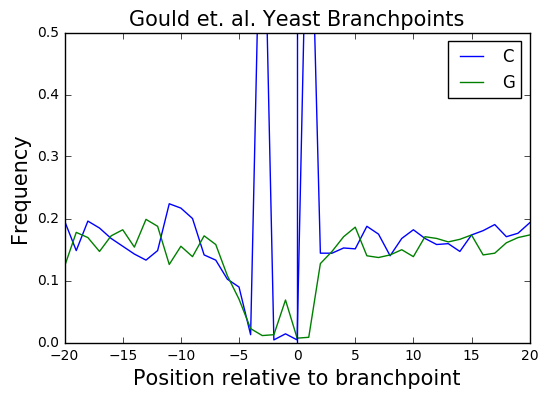

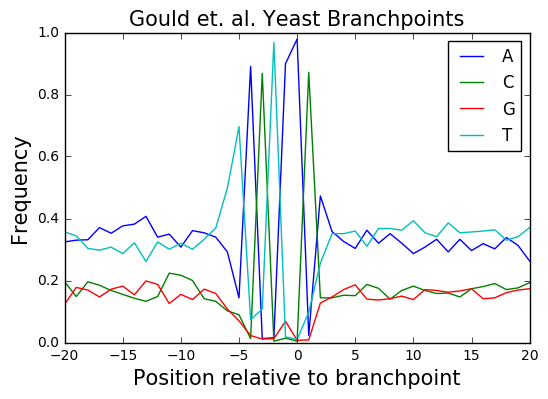

In [4]:
counts = np.zeros((len(seqs[0]), 4))
for seq in seqs:
    assert len(seq) == len(seqs[0])
    for i in range(len(seq)):
        counts[i, bases.index(seq[i])] += 1

print len(seqs)

for i, base in enumerate(bases):
    if i == 0 or i == 3: continue
    plt.plot(range(-20, 21), counts[:, i] / np.sum(counts, axis = 1), label = base)
plt.axvline(0)
plt.legend()
plt.ylim(0, .5)
plt.title('Gould et. al. Yeast Branchpoints')
plt.xlabel('Position relative to branchpoint')
plt.ylabel('Frequency')
plt.show()

for i, base in enumerate(bases):
    plt.plot(range(-20, 21), counts[:, i] / np.sum(counts, axis = 1), label = base)

plt.legend()
plt.title('Gould et. al. Yeast Branchpoints')
plt.xlabel('Position relative to branchpoint')
plt.ylabel('Frequency')
plt.show()